In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [3]:
# import data
df = pd.read_csv('data/df_all.csv')

In [4]:
df.head(3)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Alex Abrines,SG,24,OKC,75,8,1134,5.0,12.7,0.395,3.7,9.7,0.380,1.4,3.1,0.443,1.7,2.0,0.848,1.1,3.9,5.0,1.2,1.7,0.4,1.1,5.4,15.4,116.0,110.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,2018
1,Quincy Acy,PF,27,BRK,70,8,1359,4.6,13.0,0.356,3.6,10.4,0.349,1.0,2.6,0.384,1.8,2.1,0.817,1.4,7.8,9.2,2.0,1.2,1.0,2.1,5.3,14.7,99.0,110.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,2018
2,Steven Adams,C,24,OKC,76,76,2487,8.9,14.2,0.629,0.0,0.0,0.000,8.9,14.2,0.631,3.2,5.7,0.559,7.7,6.0,13.7,1.8,1.8,1.6,2.6,4.3,21.1,125.0,107.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3,2018


# _Linear Regression: An Overview_

For this project we are trying to determine a player's `WS/48`, i.e. how many 'wins' he contributes for every 48 minutes he plays. While statistics like total points, rebounds and assists are all important statistics when evaluating any given player, but there is something that trumps all other statistics in basketball (and pretty much all sports): winning. 

The statistics mentioned above only describe a particular segment of that player's contribution to his team. Luckily though this is where `WS/48` comes into play. I'm going to admit up front that it is not perfect. However, it's like the saying: "All models are wrong, but some are useful". In this case `WS/48` is a useful 'model' in bringing together a players offensive and defensive statistics into a single number that allows us to see his level of contribution towards a team winning. 

With this being said, I want to recap quickly what we've done so far up to this point for this project.

1. Pulled Per Possession and Advanced statistics from [basketball-reference.com](https://www.basketball-reference.com/) for the past ten seasons (__not including the 2018-2019 season__)
2. Cleaned up raw data into usable format
3. Performed Exploratory Data Analysis of features of the clean data set

Now we are on the fourth and final step: use machine learning to create a model that is able to approximately predict a player's `WS/48` statistic. 

How are we going to to this? Two words: linear regression. Or at least that's where we'll begin, with `sklearn`'s `LinearRegression` algorithm. 

Simply put, linear regression attempts to model the relationship between a dependent variable and one or more independent variables. If you are using one independent variable, i.e. a one-to-one relationship between the independent and dependent variable, it is called `simple linear regression`. You are not limited to just one though; you can use more than one independent variable, which is called `multiple linear regression`. In summary:

- Simple = 1 independent variable
- Multiple = 2+ independent variables

Now without further ado, let's dive in!

# _MULTIPLE LINEAR REGRESSION_

First, we'll begin by dropping a few of the columns: 

- `Player`, which contained the players name
- `Pos`, the position that that player played
- `Tm`, the team that the player played for
- `OWS`, `DWS`, `WS`: offensive win share, defensive win share, and (overall) win share
    - All three of these are related to the variable we're trying to predict, so to eliminate their potential influence we're taking them out
- `Year`, year of the season

In [5]:
# drop columns that are unnecessary for ML
df_forML = df.drop(labels = ['Player', 'Pos', 'Tm', 'OWS', 'DWS', 'WS', 'Year'], axis = 1)

In [6]:
df_forML.head(5)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS/48,OBPM,DBPM,BPM,VORP
0,24,75,8,1134,5.0,12.7,0.395,3.7,9.7,0.380,1.4,3.1,0.443,1.7,2.0,0.848,1.1,3.9,5.0,1.2,1.7,0.4,1.1,5.4,15.4,116.0,110.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,0.094,-0.5,-1.7,-2.2,-0.1
1,27,70,8,1359,4.6,13.0,0.356,3.6,10.4,0.349,1.0,2.6,0.384,1.8,2.1,0.817,1.4,7.8,9.2,2.0,1.2,1.0,2.1,5.3,14.7,99.0,110.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,0.036,-2.0,-0.2,-2.2,-0.1
2,24,76,76,2487,8.9,14.2,0.629,0.0,0.0,0.000,8.9,14.2,0.631,3.2,5.7,0.559,7.7,6.0,13.7,1.8,1.8,1.6,2.6,4.3,21.1,125.0,107.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,0.187,2.2,1.1,3.3,3.3
3,20,69,19,1368,6.4,12.5,0.512,0.0,0.3,0.000,6.4,12.2,0.523,4.7,6.6,0.721,4.3,9.7,14.0,3.7,1.2,1.5,2.4,5.1,17.5,116.0,105.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,0.148,-1.6,1.8,0.2,0.8
4,32,53,3,682,4.7,11.6,0.401,1.9,5.0,0.386,2.7,6.6,0.413,1.6,1.9,0.846,0.3,4.5,4.7,2.2,0.3,0.6,1.5,4.0,12.8,98.0,115.0,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,0.009,-4.1,-1.8,-5.8,-0.7


In [7]:
# list of features -- includes all columns except for target (WS/48)
features = df_forML.drop(labels = 'WS/48', axis = 1).columns
X = df_forML[features]

In [8]:
# target variables i.e. 'WS/48'
y = df_forML['WS/48']

In [9]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21) 

In [10]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: lr
lr = LinearRegression()

# Fit the model to the data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
from sklearn.metrics import mean_squared_error

# Predict on the hold out set and compute metrics
y_pred = lr.predict(X_test)
r2 = lr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
print("Linear Regression R squared: {}".format(r2))
print("Linear Regression RMSE: {}".format(rmse))

Linear Regression R squared: 0.9694585938753894
Linear Regression RMSE: 0.017768168883885924


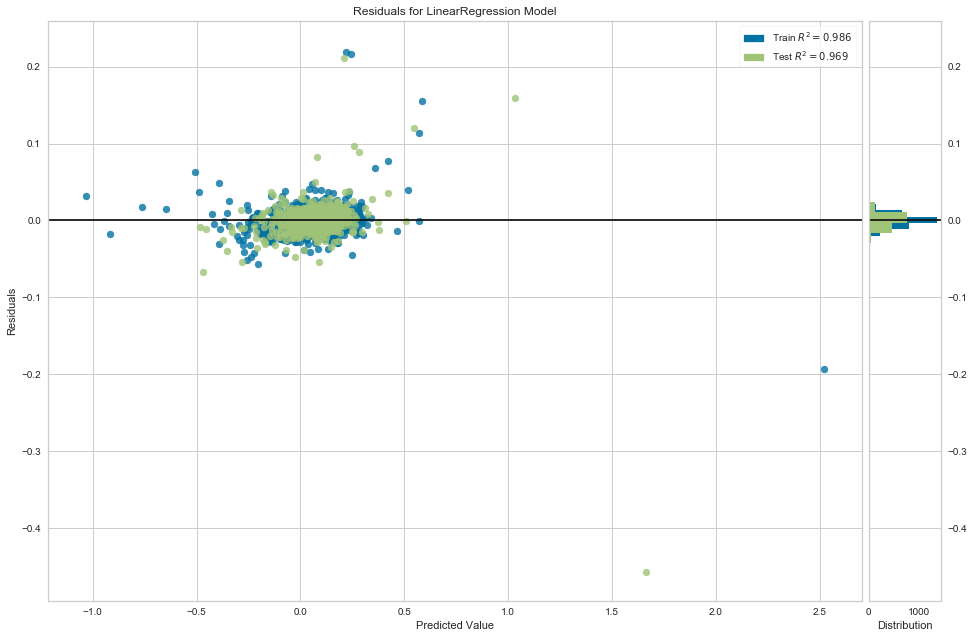

In [13]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr, size=(1152, 768), alpha = 0.8)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();                # Draw/show/poof the data

# _ASSESSMENT: MULTIPLE LINEAR REGRESSION_

So the performance of the model looks pretty amazing! The first statistic, the R squared, basically indicates how close the data is to the fitted regression line. The scale for this number is between 0 and 1.0, with 0 indicating that the model does not explain any of the variability of the response variable (it would basically just be a random assortment of points) and 1 indicating a 'perfect' model in that the model explains all of the variability of the response variable. With our R^2 statistic being ~0.96, this model looks nearly perfect! 

Next, we'll take a look at the RMSE, or root mean square error. This metric also indicates how close the observed data points are to the model's predicted values and is extremely useful in that it is presented in the same units as the response variable i.e. `WS/48`. So our RMSE is ~0.0177 which tells us that on average our predictions were this far off from the observed value.

Lastly, let's look at the residual plot. For the most part it looks good; the resiudals (i.e. the difference in the predicted value and observed value) are not systematically high or low and appear to be centered on zero. Also, the histograms to the right look approximately normally distributed, which is assumed in OLS regression. There appears to be a few outliers, particularly two that severely underestimated `WS/48` which is somewhat concerning and definitely worth looking into. Overall though, this is an impressive start. 

Looks like we got ourselves a model then, right? __WRONG__. 

But before I go further I want to create the same model as before but this time with the `statsmodels` module, which is way better than `sklearn` in regards to statistical data exploration and tests.

In [14]:
import statsmodels.api as sm

X_stats = np.array(X) # convert to numpy array
X_stats = sm.add_constant(X) # with statsmodels an intercept is not included by default so we need to add one

model = sm.OLS(y, X).fit() # fit ordinary least squares model 
predictions = model.predict(X) # predict values from fitted model

print_model = model.summary() 
print(print_model) # return a summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                  WS/48   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9670.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:43:47   Log-Likelihood:                 13830.
No. Observations:                4759   AIC:                        -2.757e+04
Df Residuals:                    4716   BIC:                        -2.730e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0001   4.72e-05      2.936      0.0

/Users/joeai/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# _Interpretation of `statsmodels` result_

Using the same features as the model we created with `sklearn`, we were able to create a model that had an R squared of 0.989, which was slightly better (albeit we did not split the data into train/test sets, a big no-no). 

However, when we scroll to the bottom we see under `Warnings` a message talking about a condition number being large, indicating the possibility of strong multicollinearity. What does this mean? 

While I won't go to deeply into exactly what the condition number is (as it is a little above my mental pay-grade and involves the use of matrices and derivatives) but from a high level it is a measure of how sensitve a function is to changes or errors in input. For linear regression specifically, it is used as a diagnostic for multicollinearity.

Now this model has a high condition number which indicates multicollinearity, but what exactly does multicollinearity mean? 

To start off, collinearity means there is an association between _two_ explanatory (independent) variables, which means that two of the features we're using have a relationship between each other. Now, multicollinearity is when two or more explanatory variables (i.e. features) in a multiple regression model are highly linearly related. [1](https://en.wikipedia.org/wiki/Multicollinearity)

Going back to our `statsmodels` example, we can see from the features that this makes total sense. A quick example is in regards to `G` (games played) and `GS` (games started); if a player plays in more games, there is probably going to be a greater liklihood that he is going to have started in more games. In other words, these two variables have a relationship! Another example to drive home the point would be in all the shooting percentages -- `FG%`, `3P%`, `2P%`, `FT%` -- as they all depend on the number of makes and attempts which are also in the feature set! 

Hopefully you can see a trend with regards to our feature set and multicollinearity. With basketball statistics, and the relatedness that a lot of them have with each other, I wasn't surprised when this happened. 

Additionally, let's take a look at the `P>|t|` column above. This column represents the `p-values` that tests the null hypothesis that the coefficient of that particular variable (i.e. feature) has no effect on the relationship. Generally a threshold of 0.05 is set, with a number below this representing the case that we reject the null hypothesis of no effect in favor of the alternative which is that this coefficient does have an effect on the response. 

What is slightly confusing however is that there are some variables, like `FG` and `PTS`, that indicated a pretty signficant relationship during our exploratory data analysis (via scatter plots) but have high p-values (i.e. we cannot reject the null hypothesis that they have no effect). My hypothesis is that the high complexity (i.e. high # of total features) of the model is leading to 'noise' crowding out the relationship. 

At this point we've poked quite a few holes in this model but where do we go from here?

The logical next step would seem to point towards feature selection, which is a very important concept in machine learning and involves selecting the most relevant variables for use in predicting the response variable, which in our case is `WS/48`. 

No we could begin by doing something along the lines of examing R squared value of each of the variables and `WS/48`, then use a subset of variables to create a model. However, this can be tedious and there is not guarantee that we won't encounter multicollinearity again. 

Which is what brings me to a new concept, called regularization...

# L1 and L2 Regularization Methods

First I want to begin by showing a (relatively) simple chart:
    
![Model Complexity](model_complexity.png)

### What is this showing us?

Three words: bias-variance tradeoff. 

Bias is associated with the features of the model, in that the more features you include the less likely you are to miss the relevant relations between the features and response variable. For the most part, the more features you include, the better you are able to capture the relationship and the less 'biased' the model becomes.

Variance has to do with sensitivity to 'noise', which are random disturbances in the data. Overfitting can happen when an algorithm begins to model this random noise versus the features we input into it. 

As you can see the more complex we make a model, we decrease the bias which is a good thing. However, there is a trade-off and that is we can begin to increase the variance expnentially, which is not a good thing. This is what has happened in our case; we've made two models that have low bias but high variance. 

Some may be wondering though, why is this whole bias-variance tradoff a big deal to begin with? It has to do with generalizing to unseen data.

When we gather data, we are essentially gathering a sample. For example, in our case we have gathered data from the past 10 NBA seasons yet the NBA's inaugural season was in 1946! So out of approximately 72 seasons we have data for only 10 of those. What we are hoping for though is to create a model with this sample that we could also use on data from the 1977 season as well, and would still do a good job. In other words, we want to be able to generalize it which means we are can confidently apply it to any NBA season (given we have the statistics from that particular season). 

At this point, I would not feel comfortable doing that. There might be certain patterns and/or 'noise' within this particular dataset that the model is including and if we were to test it on a new data set (which doesn't have this particular noise) it would probably fail. And why would you want to make a model that performs well in only particular context?

That being said, we want to decrease the bias (i.e. model complexity) of our model in hopes that we can also decrease the variance and in turn minimize the total error. 

### Regularization, and Lasso or Ridge?

What we want to do is address the issue of overfitting and regularization is one way to do this. It does this by adding penalties to the original OLS equation, as the model complexity increases. 

The two examples we'll look at -- Lasso and Ridge -- add the penalty in slightly different ways.

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds a penalty equivalent to the absolute value of the magnitude of the coefficients. Now what is the significance of a large coefficient (i.e. how much the dependent variable is expected to increase when that independent variable increases by one)?

It means that that particular feature is a good predictor for the outcome however, when it becomes too large the algortihm will begin to model the intricate relations (i.e. the 'noise') which causes overfitting. 

# TO BE CONTINUED (NEED TO FINISH THIS SECTION)

# _Ridge Regression_

In [1]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [20]:
# function to plot cross-validated R squared scores and standard error for varying different alphas
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show();

In [21]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [22]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [23]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

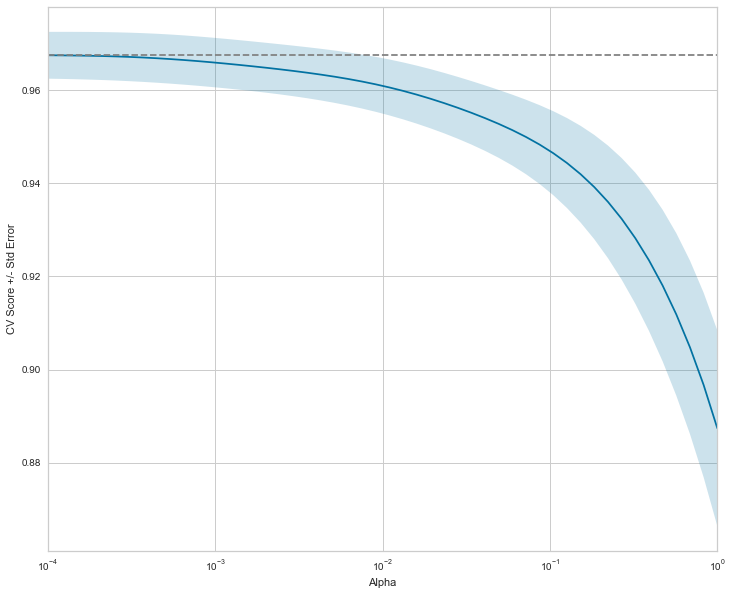

In [24]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [43]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [44]:
# import necessary modules
from sklearn.model_selection import GridSearchCV

In [45]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}

In [46]:
# Create a ridge regressor: ridge
ridge = Ridge()

In [47]:
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

In [48]:
# fit the model
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-03, 3.55... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 1.0}
Best score is 0.9576466747631932


In [50]:
# Predict on the hold out set and compute metrics
y_pred = ridge_cv.predict(X_test)
r2 = ridge_cv.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Tuned Ridge Regression R squared: {}".format(r2))
print("Tuned Ridge Regression RMSE: {}".format(rmse))

Tuned Ridge Regression Parameters: {'alpha': 1.0}
Tuned Ridge Regression R squared: 0.9608711612037328
Tuned Ridge Regression RMSE: 0.017030754967941424


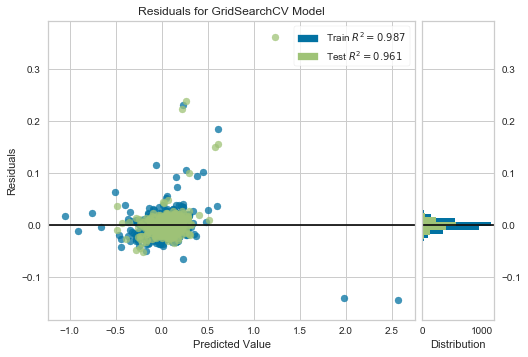

In [52]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ridge_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data